# Importing Libraries

In [1]:
%matplotlib inline
import time
import re

#data import libraries
import pandas as pd

#path libraries
from pathlib import Path
import os.path as osp

#math libraries
import math
import numpy as np
import scipy as sp
import scipy.stats as stats
from scipy.stats import norm

#plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


#sklearn libraries for data cleaning
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.preprocessing import StandardScaler #normalize your dataset
from sklearn.model_selection import train_test_split #split data to train and test data
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler #normalize your dataset
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#sklearn library for linear regression
from sklearn.linear_model import LinearRegression

#sklearn libraries for regularized regression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

#sklearn library for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import BayesianRidge

#sklearn library for knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

#sklearn libraries for decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.tree import _tree
from sklearn.tree import plot_tree

#sklearn libraries for data cleaning and cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler #normalize your dataset

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.feature_selection import SelectKBest

#sklearn library for naive bayes
from sklearn.naive_bayes import GaussianNB

#sklearn library for support vector machine
from sklearn.svm import SVC

#sklearn library for neural networks
from sklearn.neural_network import MLPClassifier

#Random Forest
from sklearn.ensemble import RandomForestClassifier

#LGBM
from lightgbm import LGBMClassifier

#sklearn library for scores and errors
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import cohen_kappa_score, log_loss
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score

#feature selection
from sklearn.feature_selection import RFECV, RFE

#imbalanced smotes
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler

#warnings
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

# Importing Training Features Data

In [2]:
vaccine_features = pd.read_csv("training_set_features.csv")

In [3]:
vaccine_features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [4]:
vaccine_features.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [5]:
vaccine_features.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

# Importing the training label dataset

In [6]:
vaccine_labels = pd.read_csv("training_set_labels.csv")

In [7]:
vaccine_labels.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [8]:
vaccine_labels.describe()

,respondent_id,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26707.000000,26707.000000
mean,13353.000000,0.212454,0.465608
std,7709.791156,0.409052,0.498825
min,0.000000,0.000000,0.000000
25%,6676.500000,0.000000,0.000000
50%,13353.000000,0.000000,0.000000
75%,20029.500000,0.000000,1.000000
max,26706.000000,1.000000,1.000000


In [9]:
vaccine_labels.dtypes

respondent_id       int64
h1n1_vaccine        int64
seasonal_vaccine    int64
dtype: object

# Merging the training features and labels dataset on the respondent id

In [10]:
vaccine = pd.merge(vaccine_features, vaccine_labels, on="respondent_id")

In [11]:
vaccine.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [12]:
vaccine.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [13]:
vaccine.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

# Function to add the labels on top of each bar at the center

In [14]:
def addLabels(x,y):
    for i in range(len(x)):
        plt.annotate(("{:.1f}".format(y[i]*100)+"%"),
          xy=(x[i], y[i]),
          xytext=(0, 1),
          textcoords="offset points",
          ha='center', va='bottom', fontsize=11)

# Plotting the percentage of people who have or have not taken the H1N1 vaccine

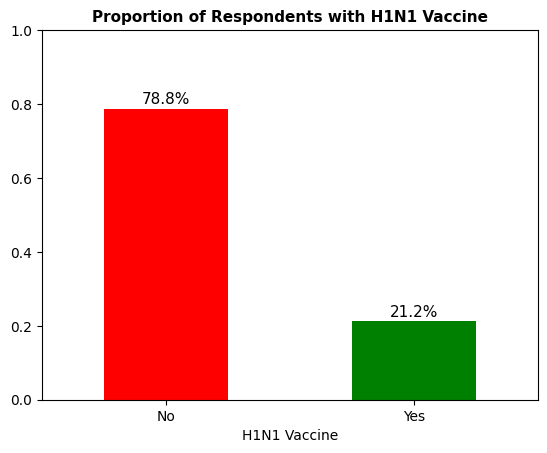

In [15]:
n_obs = vaccine.shape[0]

(vaccine['h1n1_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.bar(color=['r', 'g'])
)
addLabels([0, 1], np.round(vaccine['h1n1_vaccine'].value_counts().div(n_obs),3))
plt.title("Proportion of Respondents with H1N1 Vaccine", fontsize=11, weight="bold")
plt.xticks([0, 1], ['No', 'Yes'], rotation='horizontal')
plt.xlabel("H1N1 Vaccine")
plt.ylim(0,1)
plt.savefig("H1N1ProportionVaccine.jpg", dpi=1200)
plt.show()

# Plotting the percentage of people who have or have not taken the seasonal flu vaccine

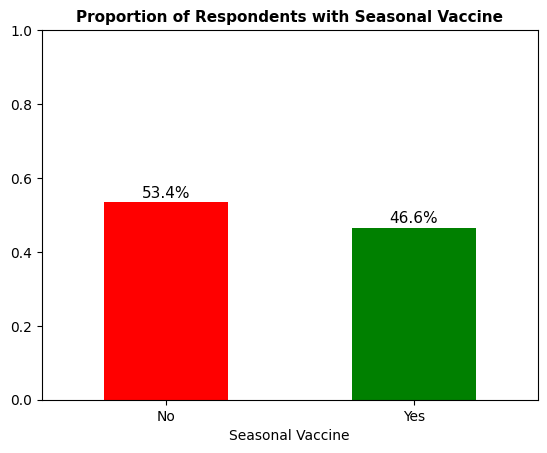

In [16]:
n_obs = vaccine.shape[0]

(vaccine['seasonal_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.bar(color=['r', 'g'])
)
addLabels([0, 1], np.round(vaccine['seasonal_vaccine'].value_counts().div(n_obs),3))
plt.xticks([0, 1], ['No', 'Yes'], rotation='horizontal')
plt.title("Proportion of Respondents with Seasonal Vaccine", fontsize=11, weight="bold")
plt.xlabel("Seasonal Vaccine")
plt.ylim(0,1)
plt.savefig("SeasonalProportionVaccine.jpg", dpi=1200)
plt.show()

# Plotting the percentage of people who have or have not taken the H1N1 and seasonal flu vaccine in same plot

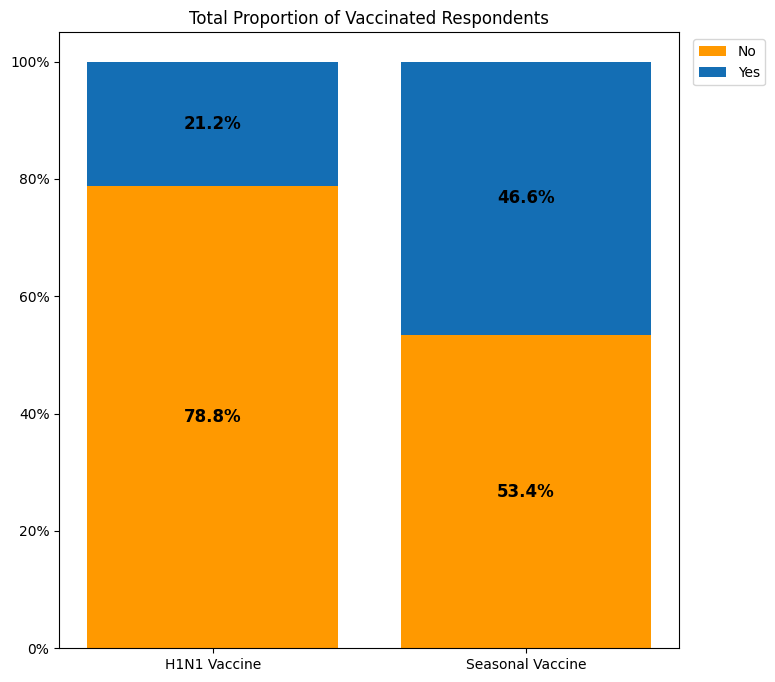

In [17]:
n_obs = vaccine.shape[0]

h1_vaccine = ((vaccine['h1n1_vaccine'].value_counts().div(n_obs))*100).to_list()
seasonal_vaccine = ((vaccine['seasonal_vaccine'].value_counts().div(n_obs))*100).to_list()

no_weights = []
no_weights.append(h1_vaccine[0])
no_weights.append(seasonal_vaccine[0])

yes_weights = []
yes_weights.append(h1_vaccine[1])
yes_weights.append(seasonal_vaccine[1])

species = (
    "H1N1 Vaccine",
    "Seasonal Vaccine"
)
weight_counts = {
    "No": no_weights,
    "Yes": yes_weights,
}

fig, ax = plt.subplots(1,1,figsize=(8,8))
bottom = np.zeros(2)

color=['#FF9900', '#146EB4']

j = 0

for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, label=boolean, bottom=bottom, color=color[j])

    for i, rect in enumerate(p):
        height = rect.get_height()
        if height >= 0:
            ax.text(rect.get_x() + rect.get_width() / 2,
                    bottom[i] + height / 2,
                    "{:.1f}%".format(height),
                    ha='center',
                    va='center',
                   fontsize=12,
                   weight="bold")

    bottom += weight_count
    j += 1

ax.set_title("Total Proportion of Vaccinated Respondents")
ax.legend(bbox_to_anchor=(1.15, 1))
ax.set_yticks(ticks=[0, 20, 40, 60, 80, 100], labels=["0%", "20%", "40%", "60%", "80%", "100%"])
plt.savefig("StackedBarChartv1.pdf", bbox_inches="tight")
plt.show()

# Correlation Matrix of H1N1 Vaccine

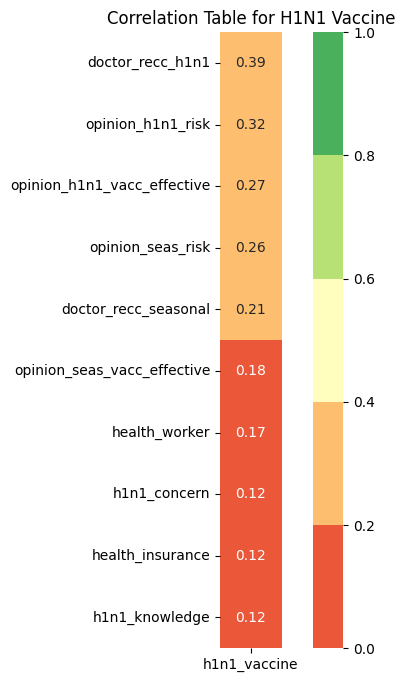

In [18]:
h1n1_vaccine = vaccine.drop(columns=['respondent_id', 'seasonal_vaccine'], axis=1)
h1n1dfCorr = abs(h1n1_vaccine.corr())[['h1n1_vaccine']].sort_values(by='h1n1_vaccine',
                                                                   ascending=False)
f, ax = plt.subplots(figsize=(8,8))
#filteredDf = dfCorr[(dfCorr !=1.000)]
sns.heatmap(h1n1dfCorr[1:11],
    cmap=list(reversed(sns.color_palette("RdYlGn_r", 5))),
    vmin=0, vmax=1.0, annot=True, fmt=".2f",
    square=True, ax=ax)


#ax.add_patch(Rectangle((0,9),10,1, fill=False, edgecolor='black', lw=3))

ax.set_title("Correlation Table for H1N1 Vaccine")
plt.savefig("H1N1CorrelationMatrix.pdf")
plt.show()

# Correlation Matrix of Seasonal Flu vaccine

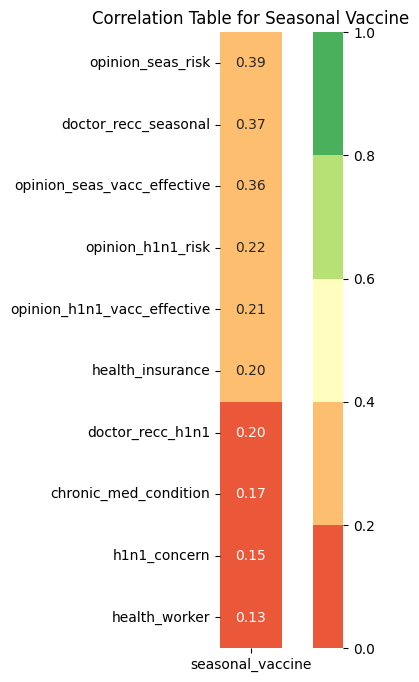

In [19]:
seasonal_vaccine = vaccine.drop(columns=['respondent_id', 'h1n1_vaccine'], axis=1)
seasonaldfCorr = abs(seasonal_vaccine.corr())[['seasonal_vaccine']].sort_values(by='seasonal_vaccine',
                                                                   ascending=False)
f, ax = plt.subplots(figsize=(8,8))
#filteredDf = dfCorr[(dfCorr !=1.000)]
sns.heatmap(seasonaldfCorr[1:11],
    cmap=list(reversed(sns.color_palette("RdYlGn_r", 5))),
    vmin=0, vmax=1.0, annot=True, fmt=".2f",
    square=True, ax=ax)


#ax.add_patch(Rectangle((0,9),10,1, fill=False, edgecolor='black', lw=3))

ax.set_title("Correlation Table for Seasonal Vaccine")
plt.savefig("SeasonalCorrelationMatrix.pdf")
plt.show()

#  Double Bar Chart Function to plot the relationship between each feature and the target and plot 2 charts

In [20]:
#create a function for some basic EDA
def stacked_barcharts(target, columns, ncols, title):

    nrows = 1 + (len(columns) - 1) // ncols
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*7))
    plt.subplots_adjust(hspace=0.3)

    for i, column in enumerate(columns):
        # calculate pivot table
        pivot = pd.crosstab(target, vaccine[column])
        # divide by column sums to get frequency per column
        freq = pivot.div(pivot.sum())
        # display as stacked bar chart with 100%
        ax = axes[i // ncols, i % ncols] if nrows > 1 else axes[i]
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            freq.transpose().plot(kind='bar', ax=ax, stacked=False)
        ax.set_yticks(ticks=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=["0%", "20%", "40%", "60%", "80%", "100%"])
        ax.set_xlabel(column.replace("_", " "))
        ax.legend(title=title)

    for i in range(len(columns), nrows * ncols):
        ax = axes[i // ncols, i % ncols] if nrows > 1 else axes[i]
        fig.delaxes(ax)




    plt.tight_layout()
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels)
    plt.savefig(title+".pdf")
    plt.show()

# Plotting the relationship of each feature and the H1N1 vaccine target

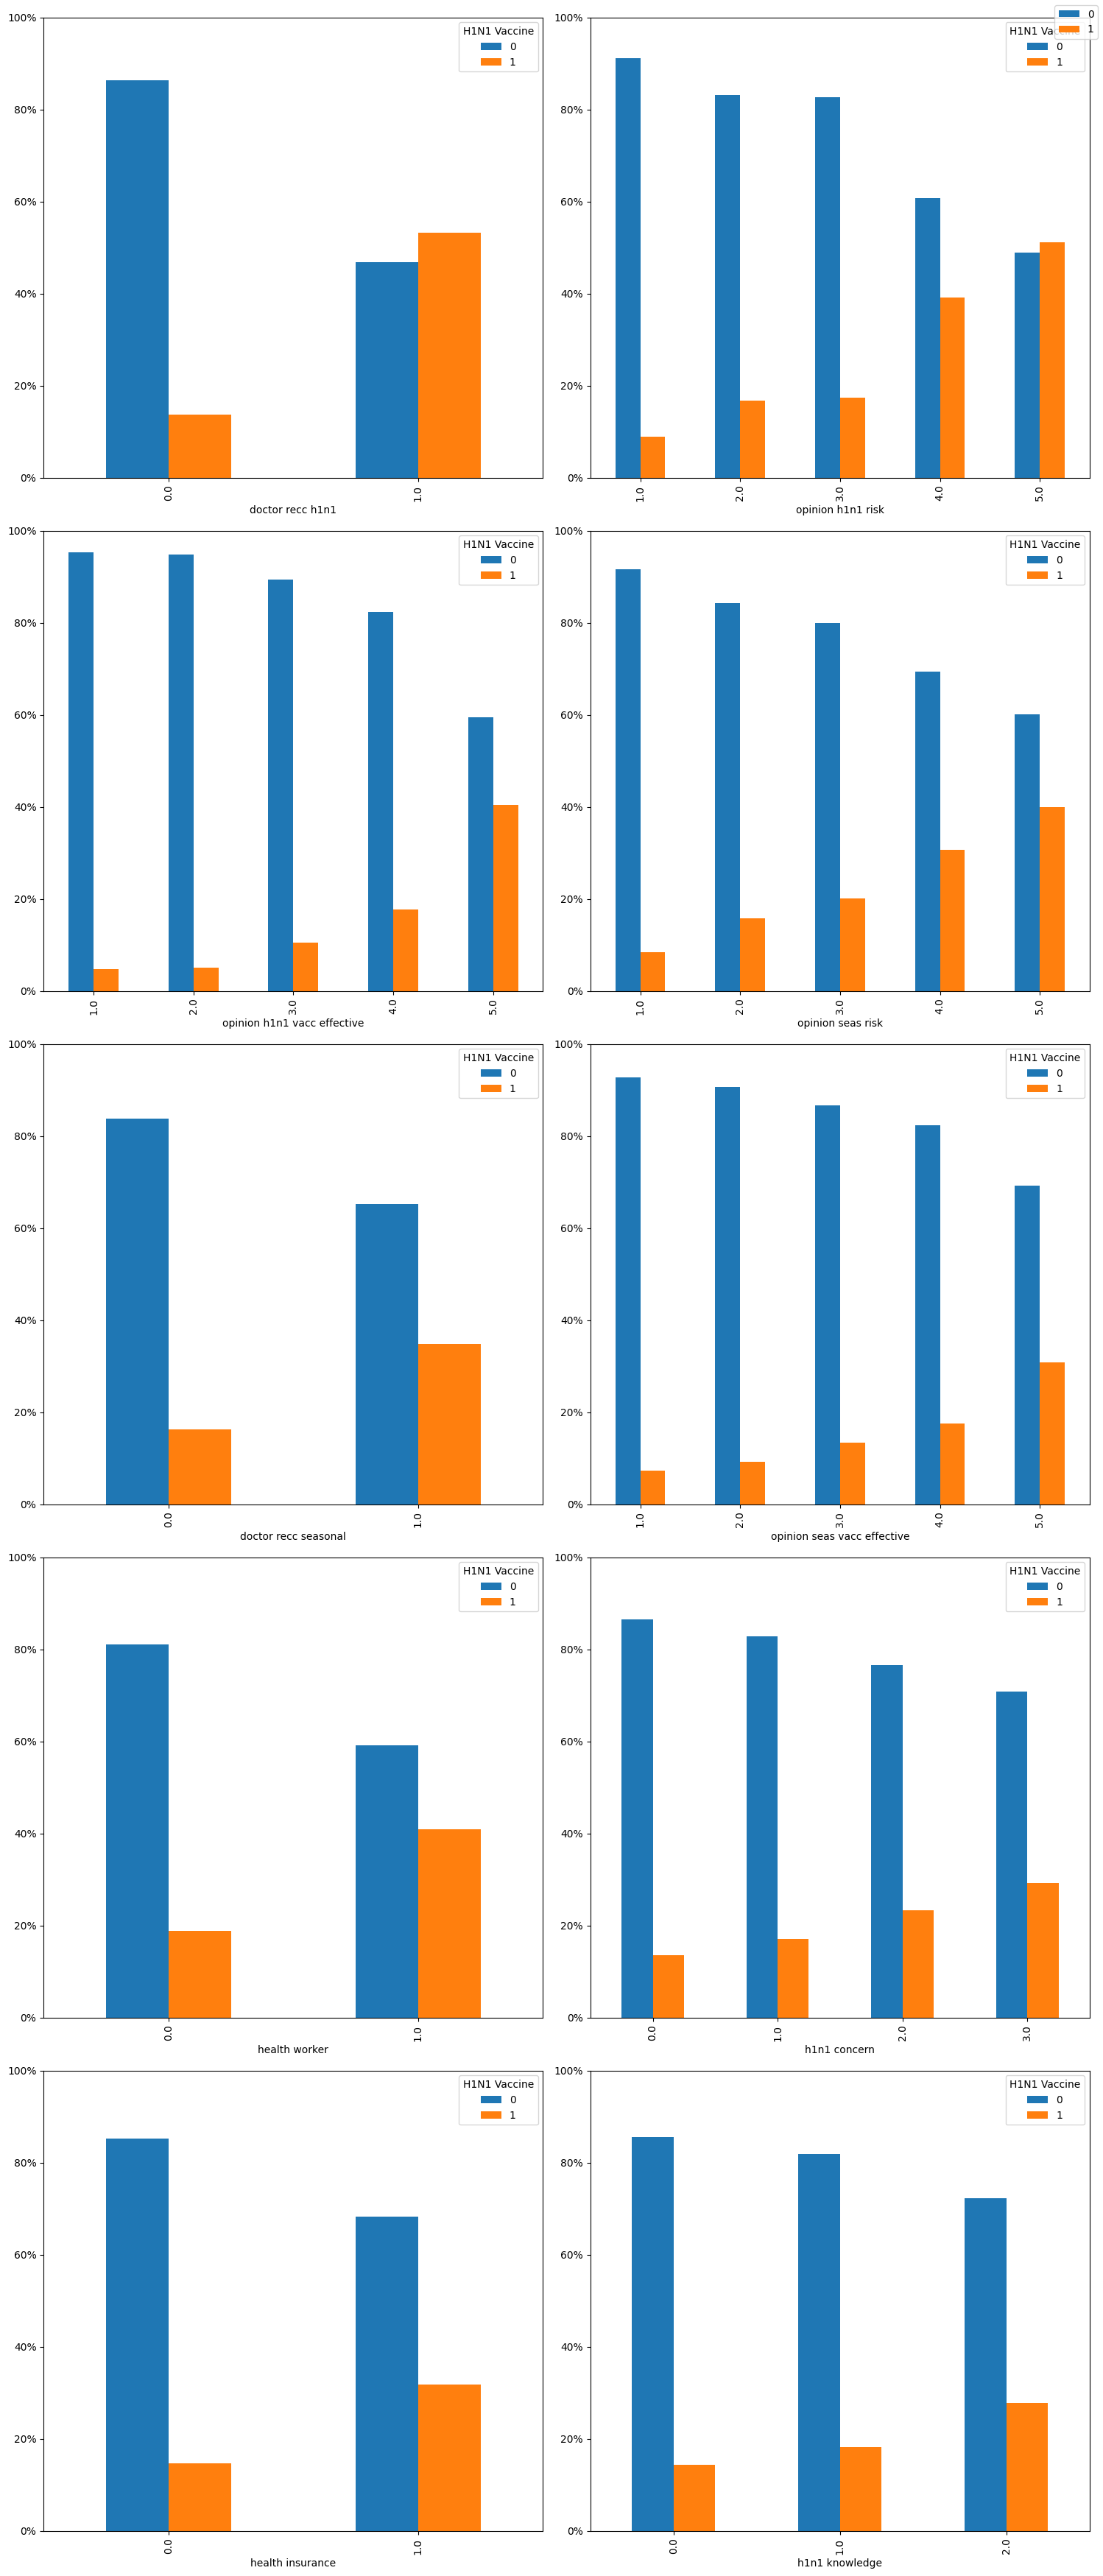

In [21]:
cols = h1n1dfCorr[1:11].reset_index()["index"].to_list()

stacked_barcharts(vaccine['h1n1_vaccine'], cols,2, 'H1N1 Vaccine')

# Plotting the relationship of each feature and the seasonal flu vaccine target

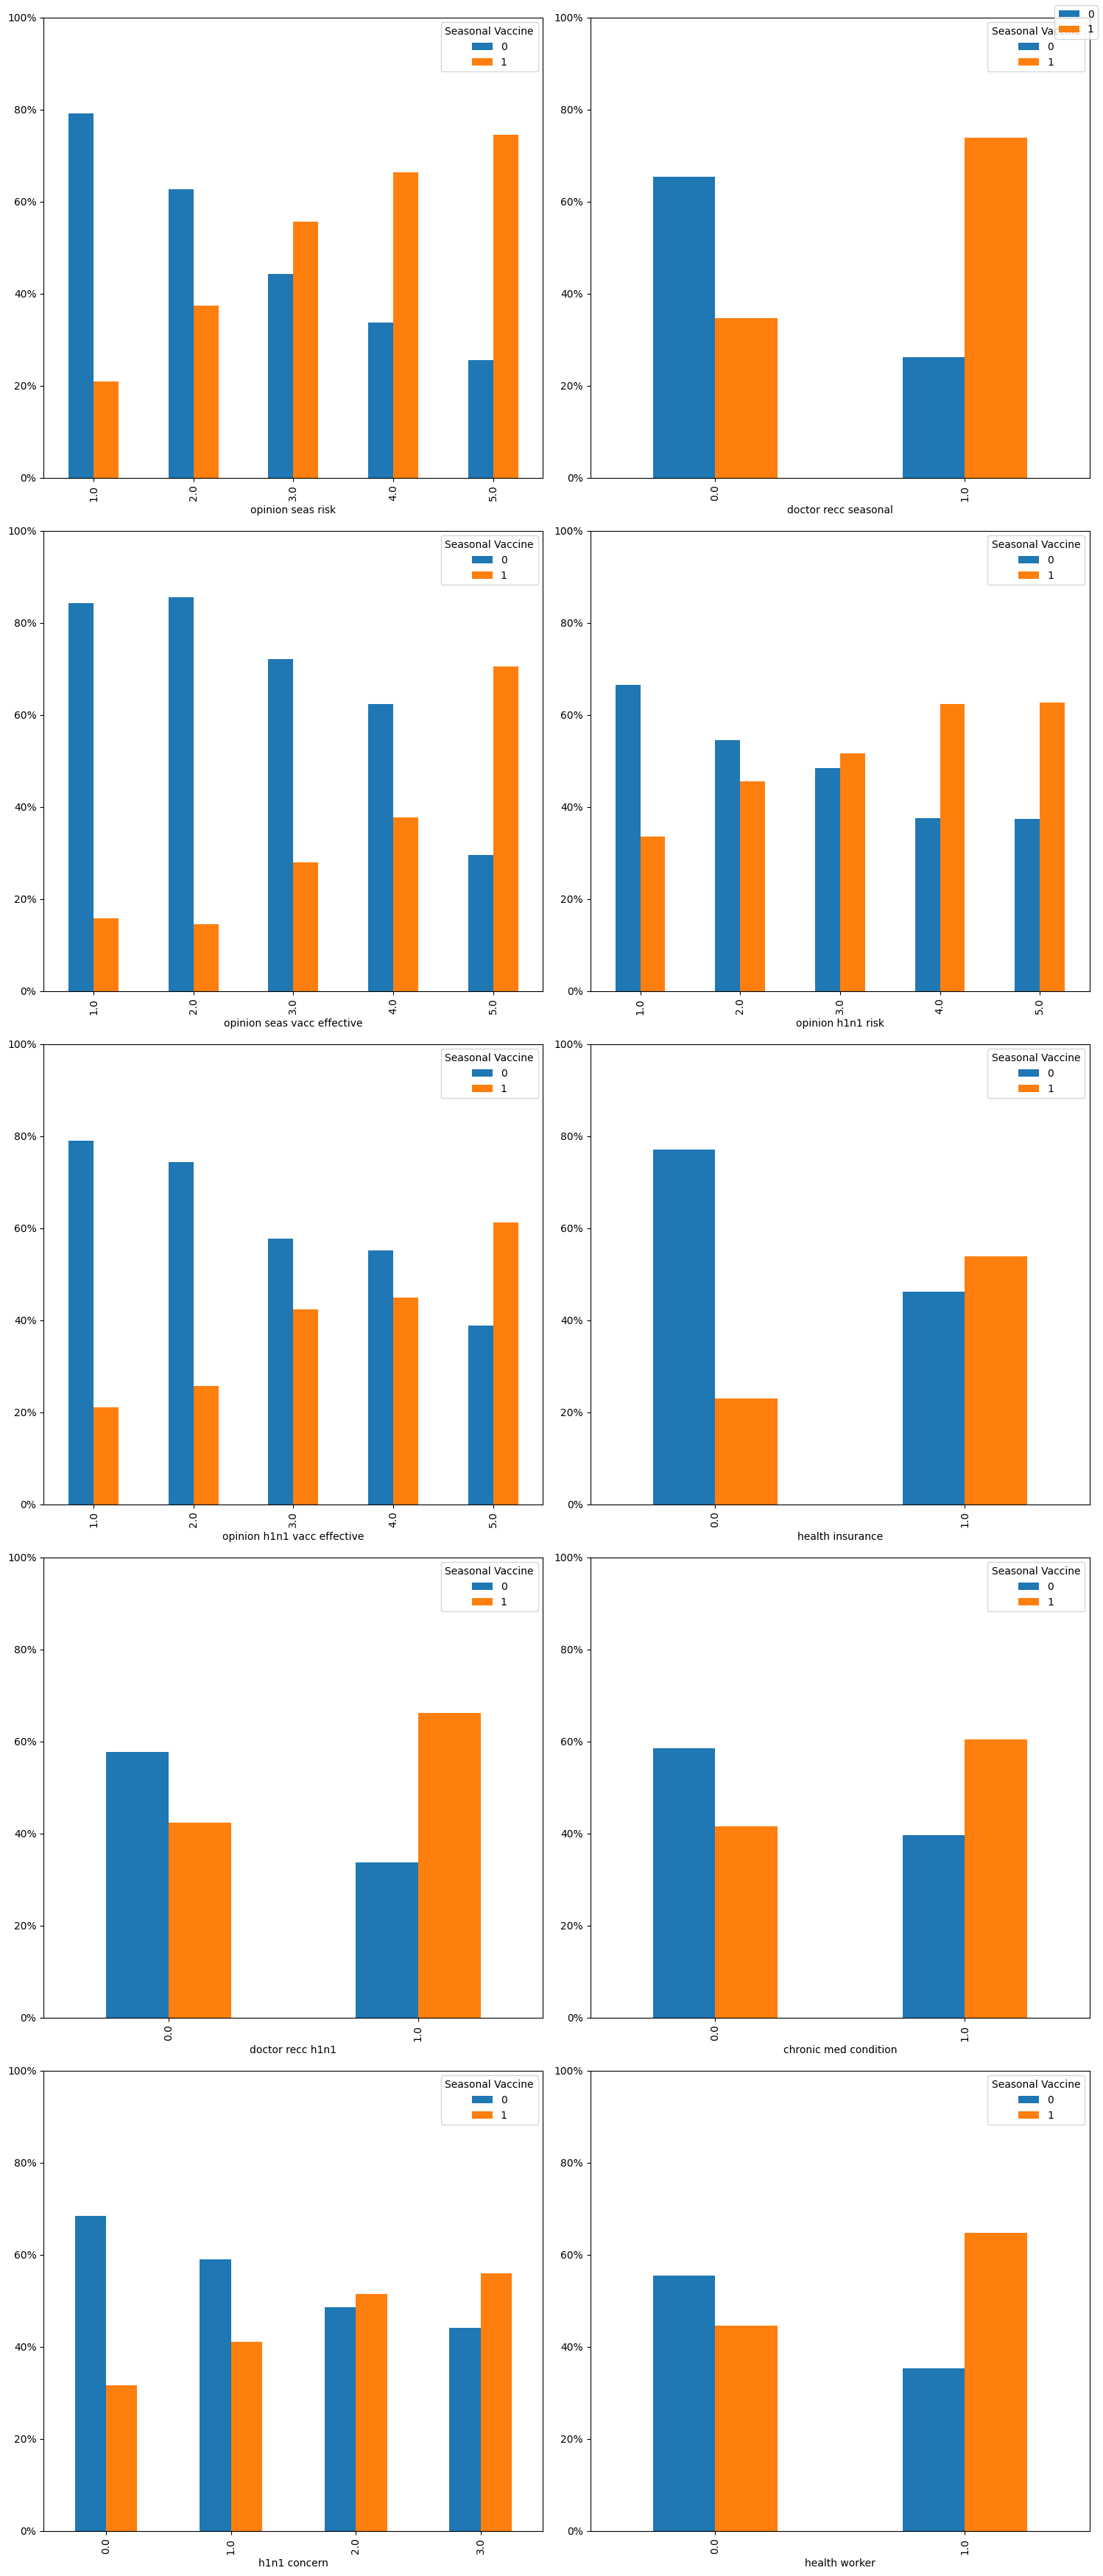

In [22]:
cols = seasonaldfCorr[1:11].reset_index()["index"].to_list()

stacked_barcharts(vaccine['seasonal_vaccine'], cols,2, 'Seasonal Vaccine' )